# 1. Import libraries


In [1]:
# Data analysis
import pandas as pd
import numpy as np
import time

# Functionality
import os
from collections import Counter

# Language processing
import string
import preprocessor as p
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from scipy.sparse import hstack 

# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Model building
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Logistic regression
from sklearn.linear_model import LogisticRegression 

# Decision tree and random forest
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# SVC
from sklearn.svm import SVC

# Neural network
from sklearn.neural_network import MLPClassifier

# Keras
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

# Word2Vec
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.use('Agg')
matplotlib.use('TkAgg')


#If keras give you troubles: pip install "numpy>=1.16.5,<1.23.0"


# 2. Import File


In [2]:
#provide path
file_path = os.path.join(os.getcwd(), "cyc_data.xlsx")



'''
Other methods
df = pd.read_csv(file_path, header=0)
data = pd.read_excel(file_path)
'''

'\nOther methods\ndf = pd.read_csv(file_path, header=0)\ndata = pd.read_excel(file_path)\n'

In [3]:
#load the data
df = pd.read_excel(file_path)
df

,CodeName,Year,Tell us about yourself; we want to know about your personality not your auto-biography.,Ricky's analysis_1,Ricky & ChatGPT analysis_1,ChatGPT only (what Ricky didn't count)_1,What do you think is your greatest strength and greatest weakness?,Ricky's analysis_2,Ricky & ChatGPT analysis_2,ChatGPT only (what Ricky didn't count)_2,Accepted for Interview or not?,Notes
0,S22.01,Sophomore,I am ambitious and driven when it comes to any...,"outgoing, sociable, Why CYC, challenger",NaN,"ambitious, team-oriented, and adaptable, stron...",I believe my greatest strength is my communica...,Resolution,Strength: Communication\nWeakness: Perfectioni...,NaN,Yes,NaN
1,S22.02,Freshman,I received a lot of help and mentorship from c...,"Why CYC, caring, self awareness, teamplayer",professional developmented,"sense of community, diverse experiences in con...","Greatest Strength: \nRecognize, admit my weakn...","High Self Awareness, resolution",Bad time management (but improving).,Strengths:\n\nRecognizing and admitting weakne...,Yes,NaN
2,S22.03,Junior,I am an ambivert that enjoys communicating and...,Lacking,NaN,"Ambivert, Helping Orientation, Appreciation of...",My greatest strength is Problem Solving and my...,"no resolution, lacking",NaN,"strong analytical skills, not confident in com...",No,NaN
3,S22.04,Junior,I am more reserved in the beginning of a new s...,introvert,adaptable attitude,"nuanced interpersonal style, openness to feedback",Greatest strength is the ability to interact w...,Lacks strong people management skill,work independently,Interact with others,No,NaN
4,S22.05,Sophomore,One of my favorite hobbies outside of school i...,"passionate, entrepreneur mindset, goal oriente...",diverse range of skills,"diverse range of interests, proactive approach",My greatest strength is being able to work wit...,NaN,"collaboration, organization, Perfectionism (Im...",NaN,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
194,F23.64,Junior,I am majoring in Computer Information Systems ...,NaN,"Leadership Development, Balanced Lifestyle,","Leadership Development, Balanced Lifestyle, Cr...",My greatest strength has to be my communicatio...,Resolution,Improving,Communication,Yes,NaN
195,F23.65,Sophomore,My most defining trait is my diligence; I alwa...,"Wholesome personal value, personal examples,","Passionate, Socially Engaged.","Diligent, Determined, Comfort Zone Challenger,...",My greatest strength is my ability to adapt to...,No resolution,NaN,Adaptability,Yes,NaN
196,F23.66,Sophomore,I like hanging out with friends and trying new...,explorer,NaN,"Adaptable, Helpful, Involved, Social, Coffee E...",My greatest strength is being a great communic...,No resolution,NaN,Communication,No,NaN
197,F23.67,Sophomore,I saved my home from getting robbed at 4 years...,"personal stories, hobbies","Team Player, Multilingual,","Traveler, Dancer, Relationship-Focused",My greatest strength is that once I become inv...,"resolution, focused",improving,"Immersive, Strong work ethic, Committed, Tunne...",Yes,NaN


## 2.1 Data Summary

In [4]:
#Finding the number of empty values

na_values = df.isna().sum()
print(na_values)

CodeName                                                                                     0
Year                                                                                         0
Tell us about yourself; we want to know about your personality not your auto-biography.      0
Ricky's analysis_1                                                                          31
Ricky & ChatGPT analysis_1                                                                  60
ChatGPT only (what Ricky didn't count)_1                                                     3
What do you think is your greatest strength and greatest weakness?                           0
Ricky's analysis_2                                                                           5
Ricky & ChatGPT analysis_2                                                                 108
ChatGPT only (what Ricky didn't count)_2                                                    43
Accepted for Interview or not?                    

In [5]:
#More data summary stuff

print("Size", df.size, "\n")
print("Label counts:")
print(df ['Accepted for Interview or not?'].value_counts(), "\n")
print("dtypes:")
print(df.dtypes, "\n")
print("Null label count:", df['Accepted for Interview or not?'].isna().sum())

Size 2388 

Label counts:
Yes    124
No      75
Name: Accepted for Interview or not?, dtype: int64 

dtypes:
CodeName                                                                                   object
Year                                                                                       object
Tell us about yourself; we want to know about your personality not your auto-biography.    object
Ricky's analysis_1                                                                         object
Ricky & ChatGPT analysis_1                                                                 object
ChatGPT only (what Ricky didn't count)_1                                                   object
What do you think is your greatest strength and greatest weakness?                         object
Ricky's analysis_2                                                                         object
Ricky & ChatGPT analysis_2                                                                 object
ChatGPT o

# 3. Data Cleaning



In [6]:
#Tokenizer

from nltk import word_tokenize

text = "I like to bake cookies"
token = nltk.word_tokenize(text)
print(token)

words =nltk.word_tokenize(text)
word_freq = Counter(words)
print(word_freq)

['I', 'like', 'to', 'bake', 'cookies']
Counter({'I': 1, 'like': 1, 'to': 1, 'bake': 1, 'cookies': 1})


In [7]:
#Defining function that will clean the text files

def preprocess_text(text):
    # Check if the text is not NaN (float type)
    if isinstance(text, str):
        # Use preprocessor to clean the text
        cleaned_text = p.clean(text)
        
        # Convert text to lowercase
        cleaned_text = cleaned_text.lower()
        
        # Tokenize the text
        tokens = word_tokenize(cleaned_text)
        
        # Remove punctuation
        tokens = [token for token in tokens if token not in string.punctuation]
        tokens = [token for token in tokens if token not in ['``', "''"]]
        
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        stop_words.discard('no')
        tokens = [token for token in tokens if token not in stop_words]
        
        # Lemmatize words
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
        
        # Join tokens back into a cleaned text
        cleaned_text = ' '.join(tokens)
         
        return cleaned_text
    else:
        # Return an empty string or handle missing values as needed
        return " "

In [8]:
drop_col =[0,4,5,8,9,11]
df = df.drop(df.columns[drop_col], axis=1)
df = df.applymap(preprocess_text)


# 4. Visualization (WordClouds)


In [9]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [10]:
%matplotlib inline

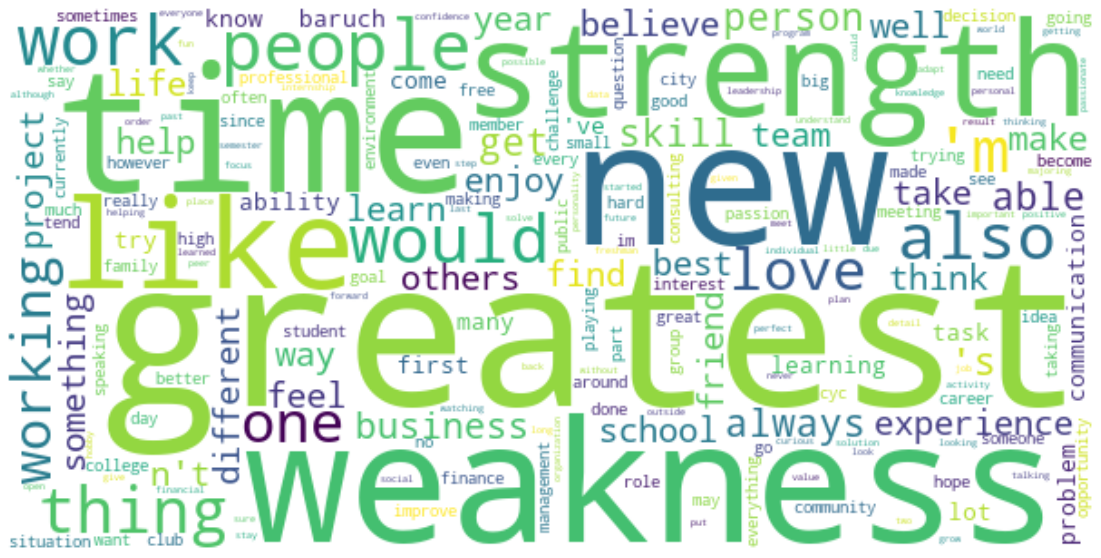

In [77]:
#Most frequent words from the applicant's answers

combined_columns = ['Tell us about yourself; we want to know about your personality not your auto-biography.',
                    'What do you think is your greatest strength and greatest weakness?',]
combined_text = ' '.join(df[combined_columns].apply(lambda row: ' '.join(row), axis=1))

word_frequency = Counter(word_tokenize(combined_text))

wordcloud = WordCloud(width=600, height=300,background_color='white').generate_from_frequencies(word_frequency)


plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordlcoud.svg', dpi =1800)
plt.show()


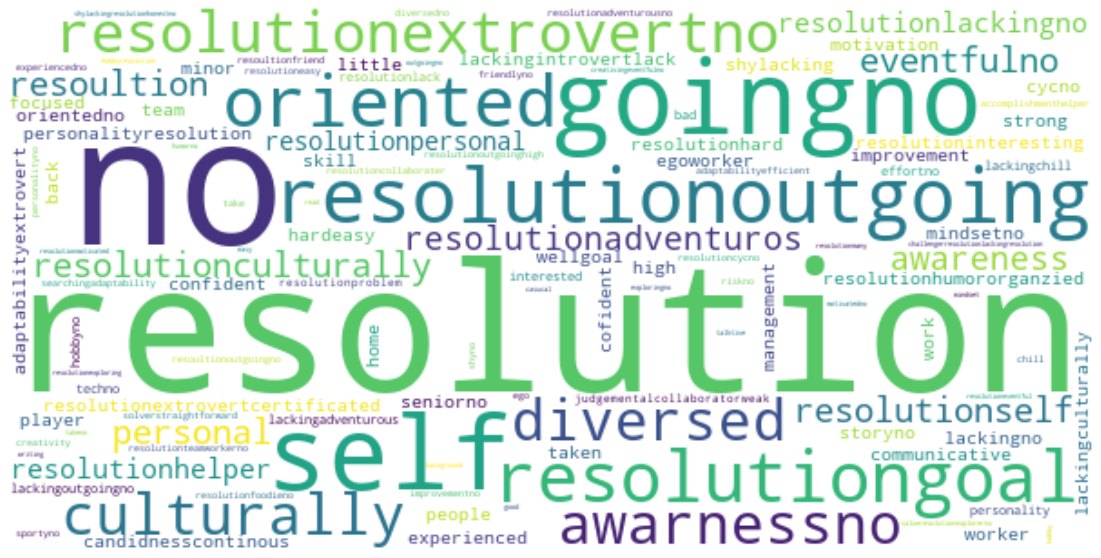

In [12]:
filtered_data = df[df['Accepted for Interview or not?'] == 'no']

combinedcolumns = ["Ricky's analysis_1", "Ricky's analysis_2"]
combinedtext = ''.join(filtered_data[combinedcolumns].apply(lambda row: ''.join(row), axis=1))

word_freq_for_no = Counter(word_tokenize(combinedtext))
                           
wordcloud2 = WordCloud(width=600, height=300, background_color='white').generate_from_frequencies(word_freq_for_no)
                          
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

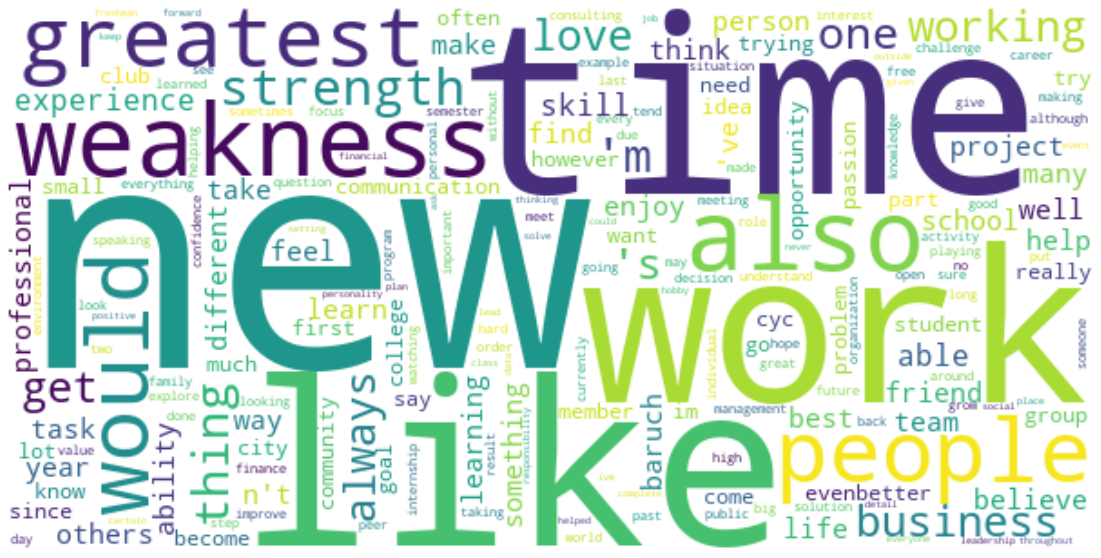

In [72]:
filtered_data = df[df['Accepted for Interview or not?'] == 'yes']

combinedcolumns = ['Tell us about yourself; we want to know about your personality not your auto-biography.',
                    'What do you think is your greatest strength and greatest weakness?',]
combinedtext = ''.join(filtered_data[combinedcolumns].apply(lambda row: ''.join(row), axis=1))

word_freq_for_no = Counter(word_tokenize(combinedtext))
                           
wordcloud2 = WordCloud(width=600, height=300, background_color='white').generate_from_frequencies(word_freq_for_no)
                          
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

<AxesSubplot:>

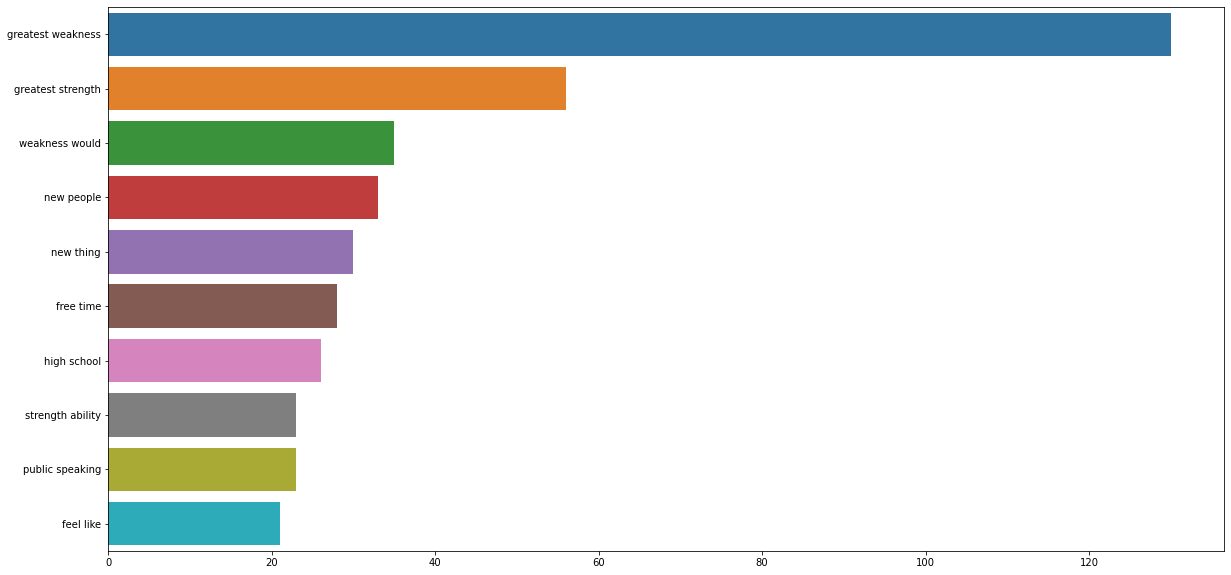

In [14]:
# N GRAMS
df['merged text'] = df['Tell us about yourself; we want to know about your personality not your auto-biography.'] + df['What do you think is your greatest strength and greatest weakness?']

def get_top_tweet_ngrams(text, n=5, top=None):
    vec = CountVectorizer(ngram_range=(n,n)).fit(text)
    bag_of_words = vec.transform(text)
    #print(bag_of_words)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top]

get_top_tweet_ngrams(df['merged text'], n=2, top=10)


top_bigrams = get_top_tweet_ngrams(df['merged text'], n=2, top=10)

x,y = map(list,zip(*top_bigrams))
plt.figure(figsize=(20, 10))
sns.barplot(x=y,y=x)
#Make charts for accepted yes and no applicants

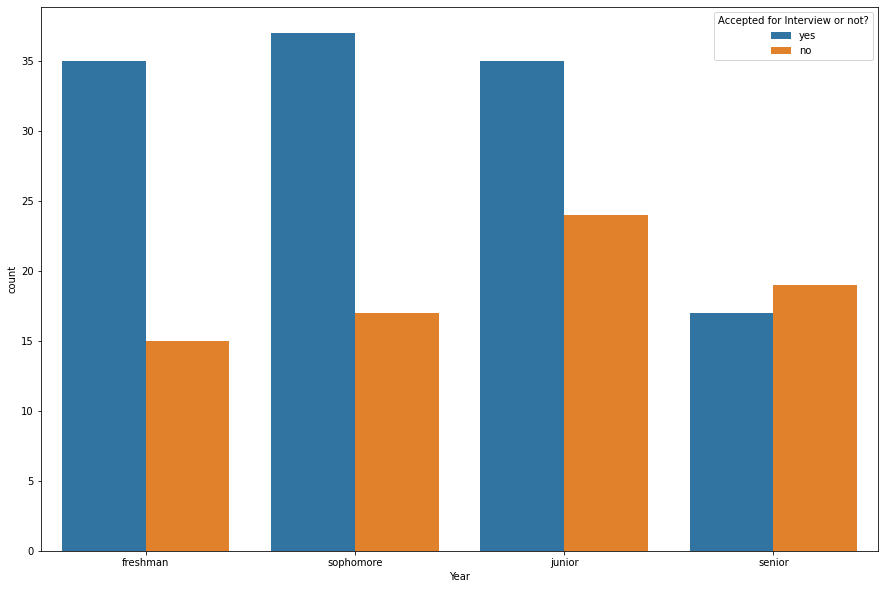

In [27]:
# Visualization between student  year and yes and no
plt.figure(figsize=(15,10))
sns.countplot(data = df, 
              x = 'Year', 
              hue = 'Accepted for Interview or not?', 
              order = ('freshman','sophomore','junior', 'senior')) 
plt.savefig('year_vs_acceptance.png',dpi=1200)

In [19]:
df

,Year,Tell us about yourself; we want to know about your personality not your auto-biography.,Ricky's analysis_1,What do you think is your greatest strength and greatest weakness?,Ricky's analysis_2,Accepted for Interview or not?,merged text
0,sophomore,ambitious driven come sort work assignment tas...,outgoing sociable cyc challenger,believe greatest strength communication always...,resolution,yes,ambitious driven come sort work assignment tas...
1,freshman,received lot help mentorship community-based o...,cyc caring self awareness teamplayer,greatest strength recognize admit weakness imp...,high self awareness resolution,yes,received lot help mentorship community-based o...
2,junior,ambivert enjoys communicating helping others a...,lacking,greatest strength problem solving greatest wea...,no resolution lacking,no,ambivert enjoys communicating helping others a...
3,junior,reserved beginning new setting become comforta...,introvert,greatest strength ability interact others over...,lack strong people management skill,no,reserved beginning new setting become comforta...
4,sophomore,one favorite hobby outside school makeup enjoy...,passionate entrepreneur mindset goal oriented ...,greatest strength able work others group impor...,,yes,one favorite hobby outside school makeup enjoy...
...,...,...,...,...,...,...,...
194,junior,majoring computer information system minoring ...,,greatest strength communication skill respond ...,resolution,yes,majoring computer information system minoring ...
195,sophomore,defining trait diligence always put best effor...,wholesome personal value personal example,greatest strength ability adapt circumstance m...,no resolution,yes,defining trait diligence always put best effor...
196,sophomore,like hanging friend trying new coffee shop sup...,explorer,greatest strength great communicator fast lear...,no resolution,no,like hanging friend trying new coffee shop sup...
197,sophomore,saved home getting robbed year old mentioned i...,personal story hobby,greatest strength become involved project full...,resolution focused,yes,saved home getting robbed year old mentioned i...


# 5.Feature Engineering And Model Building


## 5.1 Sentiment Analysis

One hot encoding,
sentiment analysis,
string indexer


In [28]:
# One hot encoding
df = pd.get_dummies(df, columns=['Year'], prefix='Year')
#df = pd.get_dummies(df, columns=['Accepted for Interview or not?'])

## 5.2 word_frequency = most frequent words from one of the cloumns above

In [29]:
#word_frequency = most frequent words from one of the cloumns above
most_common_yes=word_frequency.most_common(10)
print(most_common_yes)

print( )
most_common_no= word_freq_for_no.most_common(10)
print(most_common_no)

[('greatest', 309), ('time', 219), ('new', 218), ('weakness', 209), ('strength', 199), ('like', 197), ('people', 196), ('work', 184), ('would', 176), ('also', 168)]

[('no', 15), ('personal', 14), ('resolution', 14), ('resolutionpersonal', 10), ('goal', 9), ('personality', 9), ('easy', 8), ('going', 7), ('story', 7), ('chill', 7)]


## 5.3 Functions to perform sentiment analysis using TextBlob

In [30]:
# Function to perform sentiment analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['Sentiment_analysis_Tellme'] = df['Tell us about yourself; we want to know about your personality not your auto-biography.'].apply(get_sentiment)
df["sentiment_ricky'analysis_1"] = df["Ricky's analysis_1"].apply(get_sentiment)
df["sentiment_strength_&_weakness"] = df["What do you think is your greatest strength and greatest weakness?"].apply(get_sentiment)
df["sentiment_ricky'analysis_2"] = df["Ricky's analysis_2"].apply(get_sentiment)


In [31]:
# Adding word_count
df['word_count'] = df['merged text'].apply(lambda x: len(str(x).split()))


# 6. Model Building

## 6.1 Logistic Regression


In [32]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
x_text = df['merged text'] #Features
y = df['Accepted for Interview or not?'] #Label

X_train, X_test, y_train, y_test = train_test_split(
    x_text, y , random_state=1234, test_size=0.2, shuffle=True)

#Vectorized data
vectorizer = TfidfVectorizer()
x_text_train_tfidf = vectorizer.fit_transform(X_train)
x_test_test_tfidf = vectorizer.transform(X_test)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 200, 300, 400, 500, 1000],  # Regularization strength
}

# Create logistic regression model
lr = LogisticRegression()

# Perform grid search with cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_text_train_tfidf, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 100}


In [33]:
#Logistic regression using textual data
x_text = df['merged text'] #Features
y = df['Accepted for Interview or not?'] #Label

X_train, X_test, y_train, y_test = train_test_split(
    x_text, y , random_state=1234, test_size=0.2, shuffle=True)

#Vectorized data
vectorizer = TfidfVectorizer()
x_text_train_tfidf = vectorizer.fit_transform(X_train)
x_test_test_tfidf = vectorizer.transform(X_test)

#print(x_text_train_tfidf[:10, :20].toarray())

Logreg = LogisticRegression(C = 100)
Logreg.fit(x_text_train_tfidf, y_train)
y_pred = Logreg.predict(x_test_test_tfidf)

#Evualuate the model
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Model Accuracy:", accuracy)
print(" ")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(" ")
print(Logreg.coef_)


#Score is .575



Logistic Regression Model Accuracy: 0.725
 
              precision    recall  f1-score   support

          no       0.80      0.47      0.59        17
         yes       0.70      0.91      0.79        23

    accuracy                           0.73        40
   macro avg       0.75      0.69      0.69        40
weighted avg       0.74      0.72      0.71        40

 
[[0.514696   0.21485679 0.39120381 ... 0.14642036 0.19065678 0.78588256]]


In [34]:
#Logistic Regression using Student Years and total word count
from sklearn.pipeline import Pipeline, FeatureUnion

binaries= ['Year_freshman','Year_sophomore', 'Year_junior', 'Year_senior', 'word_count']
#'Sentiment_analysis_Tellme', "sentiment_ricky'analysis_1", 'sentiment_strength_&_weakness', "sentiment_ricky'analysis_2"]]


x = df[binaries] #Features
y = df['Accepted for Interview or not?'] #Label

X_train, X_test, y_train, y_test = train_test_split(x, y , random_state=1234, test_size=0.2, shuffle=True)


logreg2= LogisticRegression(C = 100)
binary_pipeline = Pipeline([('classifier', logreg2)])
binary_pipeline.fit(X_train,y_train)
y_pred2 = binary_pipeline.predict(X_test)


accuracy = accuracy_score(y_test, y_pred2)
print("Logistic Regression Model Accuracy:", accuracy)
print(" ")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))
print(" ")
print(logreg2.coef_)




Logistic Regression Model Accuracy: 0.8
 
              precision    recall  f1-score   support

          no       0.80      0.71      0.75        17
         yes       0.80      0.87      0.83        23

    accuracy                           0.80        40
   macro avg       0.80      0.79      0.79        40
weighted avg       0.80      0.80      0.80        40

 
[[ 0.26083622  0.06892451  0.16572916 -0.49547788  0.05433022]]


In [35]:
#Implementing k-fold cross validations
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [36]:
cv = KFold(n_splits = 10, random_state=1234, shuffle = True)

Logreg = LogisticRegression(C = 100)
#Logreg.fit(x_text_train_tfidf, y_train)
model_2_scores = cross_val_score(Logreg, x_text_train_tfidf,  y_train, scoring= 'accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(model_2_scores), std(model_2_scores)))


Accuracy: 0.704 (0.122)


In [22]:
df.columns

Index(['Tell us about yourself; we want to know about your personality not your auto-biography.',
       'Ricky's analysis_1',
       'What do you think is your greatest strength and greatest weakness?',
       'Ricky's analysis_2', 'Accepted for Interview or not?', 'merged text',
       'Year_freshman', 'Year_junior', 'Year_senior', 'Year_sophomore',
       'Sentiment_analysis_Tellme', 'sentiment_ricky'analysis_1',
       'sentiment_strength_&_weakness', 'sentiment_ricky'analysis_2',
       'word_count'],
      dtype='object')

## 6.2 Decision Trees
Decision Trees


In [23]:
from sklearn import tree

binaries= ['Year_freshman','Year_sophomore', 'Year_junior', 'Year_senior', 'word_count']
x = df[binaries] #Features
y = df['Accepted for Interview or not?'] #Label
X_train, X_test, y_train, y_test = train_test_split(x, y , random_state=1234, test_size=0.2, shuffle=True)


tree = tree.DecisionTreeClassifier(random_state=1234).fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)



accuracy = accuracy_score(y_test, y_pred_tree)
print("Decision Tree  Accuracy:", accuracy)
print(" ")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(" ")
print(logreg2.coef_)

Decision Tree  Accuracy: 0.725
 
              precision    recall  f1-score   support

          no       0.00      0.00      0.00        17
         yes       0.57      1.00      0.73        23

    accuracy                           0.57        40
   macro avg       0.29      0.50      0.37        40
weighted avg       0.33      0.57      0.42        40

 
[[ 0.20541154  0.05442724  0.13921571 -0.39902457  0.05401194]]


C:\Users\Willy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Willy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Willy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
#Decision Tree using textual data
from sklearn import tree
x_text = df['merged text'] #Features
y = df['Accepted for Interview or not?'] #Label

X_train, X_test, y_train, y_test = train_test_split(
    x_text, y , random_state=1234, test_size=0.2, shuffle=True)

vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(X_train)
x_test_tfidf = vectorizer.transform(X_test)


tree = tree.DecisionTreeClassifier(random_state=1234).fit(x_train_tfidf,y_train)
y_pred_tree = tree.predict(x_test_tfidf)


accuracy = accuracy_score(y_test, y_pred_tree)
print("Decision Tree  Accuracy:", accuracy)
print(" ")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(" ")
print(logreg2.coef_)

Decision Tree  Accuracy: 0.6
 
              precision    recall  f1-score   support

          no       0.00      0.00      0.00        17
         yes       0.57      1.00      0.73        23

    accuracy                           0.57        40
   macro avg       0.29      0.50      0.37        40
weighted avg       0.33      0.57      0.42        40

 
[[ 0.20541154  0.05442724  0.13921571 -0.39902457  0.05401194]]


C:\Users\Willy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Willy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Willy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
 #%matplotlib inline 

##  6.3 Random Forest Models


### 6.3.1 Random Forest with numerical/text data

Random Forest with numerical data

In [61]:
from sklearn.ensemble import RandomForestClassifier
binaries= ['Year_freshman','Year_sophomore', 'Year_junior', 'Year_senior', 'word_count',]
x = df[binaries] #Features
y = df['Accepted for Interview or not?'] #Label
X_train, X_test, y_train, y_test = train_test_split(x, y , random_state=1234, test_size=0.2, shuffle=True)


model_rforest = RandomForestClassifier(n_estimators = 100)
model_rforest.fit(X_train, y_train)


print(f'Random Forest Model Accuracy = {model_rforest.score(X_test, y_test)}')

y_predict = model_rforest.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)
print("\n")
#print("Classification Report:")
#print(classification_report(y_test, y_predict))

Random Forest Model Accuracy = 0.75
[[11  6]
 [ 4 19]]




Random Forest with text data

In [60]:
#Random Forest using textual data
from sklearn import tree
x = df['merged text'] #Features
y = df['Accepted for Interview or not?'] #Label

X_train, X_test, y_train, y_test = train_test_split(x, y , random_state=1234, test_size=0.2, shuffle=True)

vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(X_train)
x_test_tfidf = vectorizer.transform(X_test)

rf_model_text = RandomForestClassifier(random_state=1234)
rf_model_text.fit(x_train_tfidf,y_train)

y_pred_tf = rf_model_text.predict(x_test_tfidf)
cm = confusion_matrix(y_test, y_pred_tf)


accuracy = accuracy_score(y_test, y_pred_tf)
print("Forest Random Accuracy:", accuracy)
print(cm)
print(" ")
from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred))



Forest Random Accuracy: 0.875
[[15  2]
 [ 3 20]]
 


### 6.3.2 Random Forest Visualizations

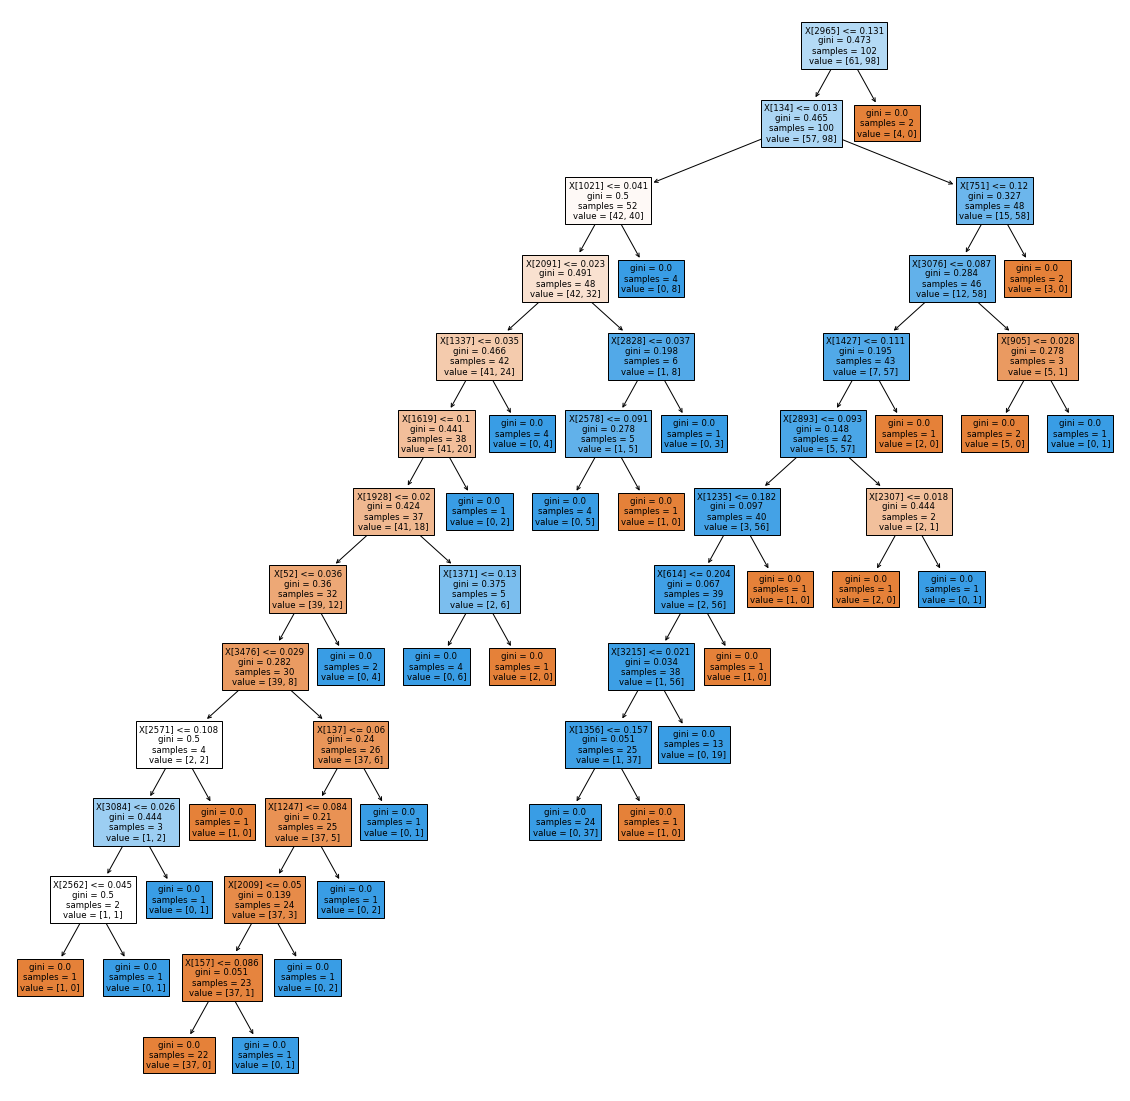

In [62]:
#numerical
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(rf_model.estimators_[0],filled=True)
plt.savefig('Random_Forest_Visualization',dpi=300)


[Text(0.794392523364486, 0.9722222222222222, 'X[2551] <= 0.147\ngini = 0.44\nsamples = 104\nvalue = [52, 107]'),
 Text(0.7570093457943925, 0.9166666666666666, 'X[2522] <= 0.017\ngini = 0.428\nsamples = 102\nvalue = [48, 107]'),
 Text(0.6635514018691588, 0.8611111111111112, 'X[2469] <= 0.125\ngini = 0.464\nsamples = 81\nvalue = [46, 80]'),
 Text(0.6261682242990654, 0.8055555555555556, 'X[3502] <= 0.04\ngini = 0.444\nsamples = 78\nvalue = [40, 80]'),
 Text(0.5887850467289719, 0.75, 'X[2779] <= 0.022\ngini = 0.468\nsamples = 71\nvalue = [40, 67]'),
 Text(0.4672897196261682, 0.6944444444444444, 'X[3538] <= 0.045\ngini = 0.497\nsamples = 58\nvalue = [39, 46]'),
 Text(0.3364485981308411, 0.6388888888888888, 'X[2565] <= 0.034\ngini = 0.485\nsamples = 40\nvalue = [34, 24]'),
 Text(0.2616822429906542, 0.5833333333333334, 'X[69] <= 0.035\ngini = 0.457\nsamples = 35\nvalue = [33, 18]'),
 Text(0.22429906542056074, 0.5277777777777778, 'X[664] <= 0.037\ngini = 0.418\nsamples = 33\nvalue = [33, 14]')

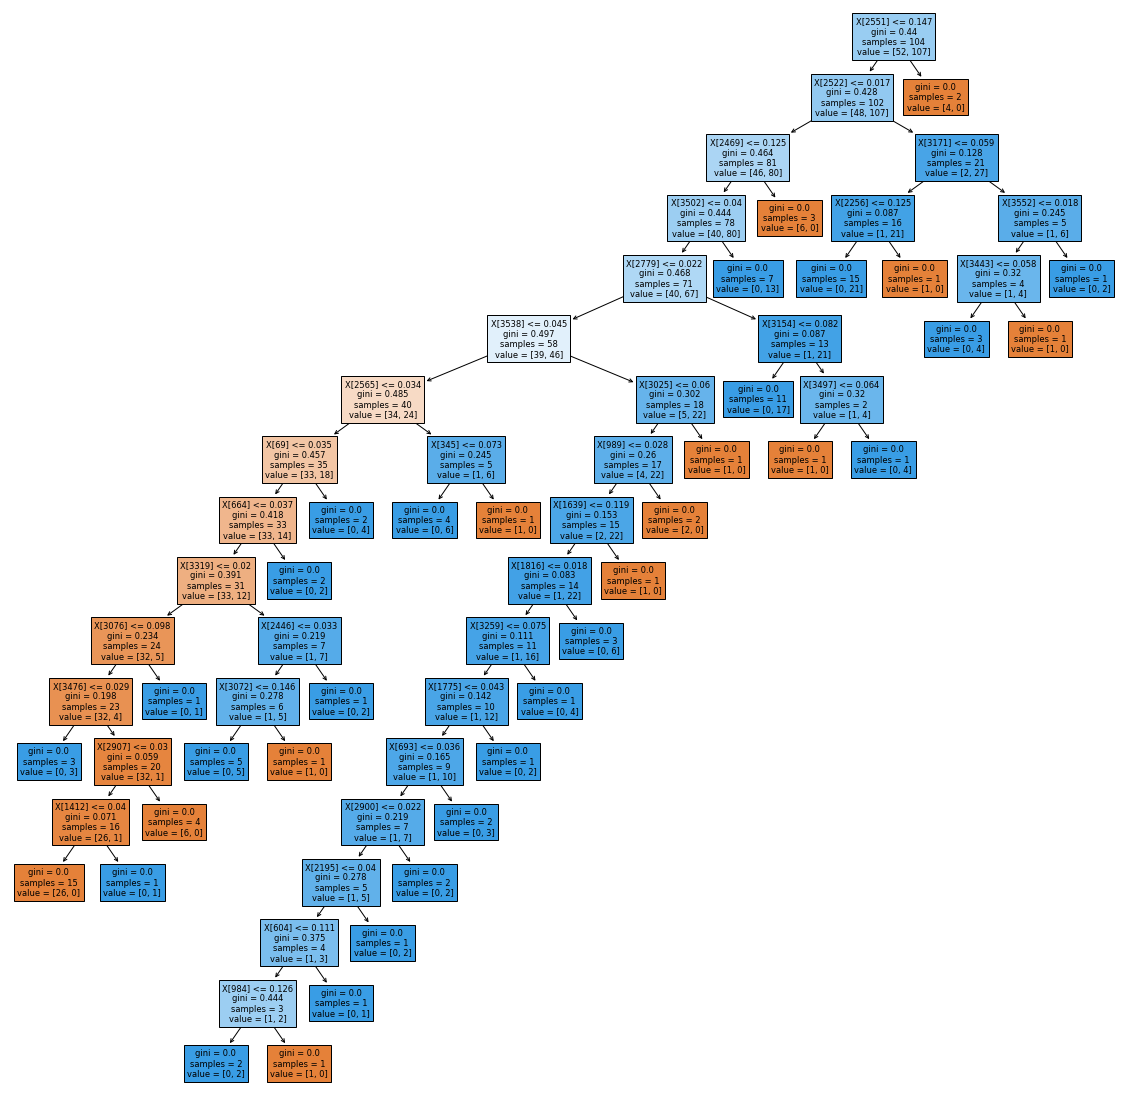

In [63]:
#textual
#Visualization of textual random forest
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(rf_model_text.estimators_[5],filled=True)
#plt.savefig('Random_Forest_Visualization',dpi=300)


### 6.3.3 Hyper Parameter Tuning Using GridSearch

In [38]:
#Random Forest GridSearch for hyperparameter tuning
#Numerical Data
from sklearn.ensemble import RandomForestClassifier


stuff= ['Year_freshman','Year_sophomore', 'Year_junior', 'Year_senior', 'word_count',]
x = df[stuff] #Features
y = df['Accepted for Interview or not?'] #Label
X_train, X_test, y_train, y_test = train_test_split(x, y , random_state=1234, test_size=0.2, shuffle=True)

param_grid = {
    'bootstrap' : [True, False],
    'max_depth' : [None, 10, 20, 30, 40, 50],
    'n_estimators' : [100, 200, 300]
}

model_rforest = RandomForestClassifier()
grid_search = GridSearchCV(model_rforest, param_grid, cv=5, scoring = 'accuracy')
grid_search.fit(X_train,y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'bootstrap': True, 'max_depth': 40, 'n_estimators': 100}


In [40]:
#Random Forest GridSearch for hyperparameter tuning
#text
from sklearn.ensemble import RandomForestClassifier


x = df['merged text'] #Features
y = df['Accepted for Interview or not?'] #Label
X_train, X_test, y_train, y_test = train_test_split(x, y , 
                                                    random_state=1234, 
                                                    test_size=0.2, 
                                                    shuffle=True)

vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(X_train)
x_test_tfidf = vectorizer.transform(X_test)

param_grid = {
    'bootstrap' : [True, False],
    'max_depth' : [None, 10, 20, 30, 40, 50],
    'n_estimators' : [100, 200, 300]
}

model_rforest_text = RandomForestClassifier()
grid_search = GridSearchCV(model_rforest_text, param_grid, cv=5, scoring = 'accuracy')
grid_search.fit(x_train_tfidf,y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'n_estimators': 100}


In [54]:
#Random Forest _ Numerical w/ HyperParameter Tuning

x = df['merged text'] #Features
y = df['Accepted for Interview or not?'] #Label
X_train, X_test, y_train, y_test = train_test_split(x, y , 
                                                    random_state=1234, 
                                                    test_size=0.2, 
                                                    shuffle=True)

vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(X_train)
x_test_tfidf = vectorizer.transform(X_test)

rf_model = RandomForestClassifier()
rf_model.fit(x_train_tfidf, y_train)


print(f'Random Forest Model Accuracy = {rf_model.score(X_test, y_test)}')


y_predict = rf_model.predict(x_test_tfidf)

#confusion matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)
print("\n")
print("Classification Report:")
print(classification_report(y_test, y_predict))

ValueError: could not convert string to float: 'like hanging friend trying new coffee shop super adaptable try best helpful involved around campusgreatest strength great communicator fast learner greatest weakness overthink hard work no matter perfect'

### 6.3.4 Random Forest with Statified CV

In [55]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

x = df['merged text']  # Features
y = df['Accepted for Interview or not?']  # Label

# Stratified K-Fold Cross-Validation for Imbalanced Data
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)  # Adjust n_splits as needed

mean_accuracy = []
# Iterate through cross-validation folds
for train_index, test_index in skf.split(x, y):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer()
    x_train_tfidf = vectorizer.fit_transform(X_train)
    x_test_tfidf = vectorizer.transform(X_test)

    # Train the Random Forest Classifier
    rf_model_text = RandomForestClassifier(max_depth = 10, 
                                           n_estimators = 100, 
                                           bootstrap = True,
                                           random_state=1234)
    rf_model_text.fit(x_train_tfidf, y_train)

    # Make Predictions and Evaluate Performance
    y_pred_tf = rf_model_text.predict(x_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred_tf)
    mean_accuracy.append(accuracy)
    cm = confusion_matrix(y_test, y_pred_tf)

    print(f"Fold Accuracy:", accuracy)
    #print(f"Confusion Matrix:\n{cm}")
    #print(f"Classification Report:\n{classification_report(y_test, y_pred_tf)}")
    print("-" * 50)  # Separator for clarity
    
print(f' Mean Accuracy from Stratified CV: {np.average(mean_accuracy).round(2)}')

Fold Accuracy: 0.8
--------------------------------------------------
Fold Accuracy: 0.75
--------------------------------------------------
Fold Accuracy: 0.8
--------------------------------------------------
Fold Accuracy: 0.85
--------------------------------------------------
Fold Accuracy: 0.8717948717948718
--------------------------------------------------
 Mean Accuracy from Stratified CV: 0.81


In [56]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

binaries= ['Year_freshman','Year_sophomore', 'Year_junior', 'Year_senior', 'word_count',]
x = df[binaries] #Features
y = df['Accepted for Interview or not?']  # Label

# Stratified K-Fold Cross-Validation for Imbalanced Data
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)  # Adjust n_splits as needed

mean_accuracy = []
# Iterate through cross-validation folds
for train_index, test_index in skf.split(x, y):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the Random Forest Classifier
    rf_model_text = RandomForestClassifier(max_depth = 10, 
                                           n_estimators = 100, 
                                           bootstrap = True,
                                           random_state=1234)
    rf_model_text.fit(X_train, y_train)

    # Make Predictions and Evaluate Performance
    y_pred_tf = rf_model_text.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_tf)
    mean_accuracy.append(accuracy)
    cm = confusion_matrix(y_test, y_pred_tf)

    print(f"Fold Accuracy:", accuracy)
    #print(f"Confusion Matrix:\n{cm}")
    #print(f"Classification Report:\n{classification_report(y_test, y_pred_tf)}")
    print("-" * 50)  # Separator for clarity
    
print(f' Mean Accuracy from Stratified CV: {np.average(mean_accuracy).round(2)}')

Fold Accuracy: 0.775
--------------------------------------------------
Fold Accuracy: 0.725
--------------------------------------------------
Fold Accuracy: 0.725
--------------------------------------------------
Fold Accuracy: 0.725
--------------------------------------------------
Fold Accuracy: 0.8974358974358975
--------------------------------------------------
 Mean Accuracy from Stratified CV: 0.77


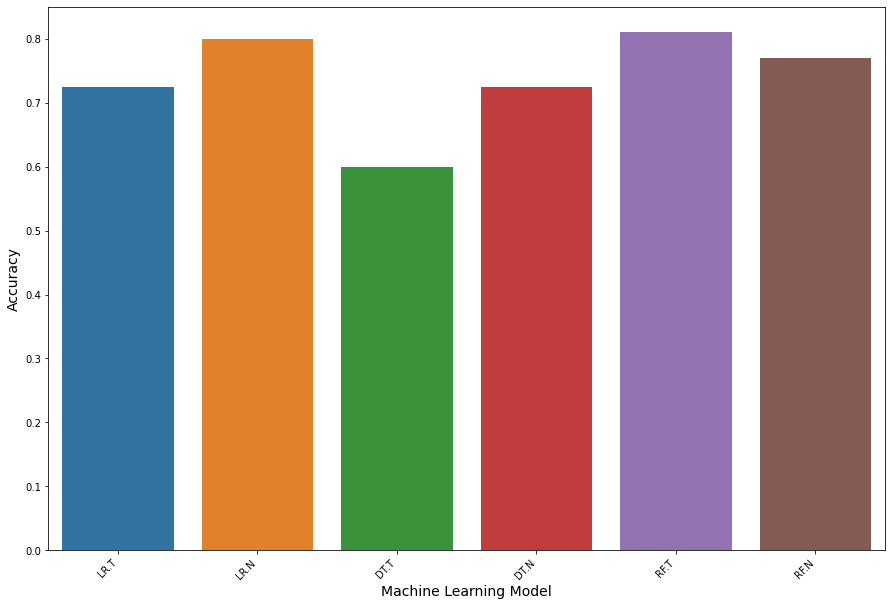

In [66]:
lr_acc_text = 0.725
lr_acc_num = 0.8
dt_acc_text = 0.6
dt_acc_num = 0.725
rf_acc_text = 0.81
rf_acc_num = 0.77

acc_dict = {
    "LR.T": lr_acc_text,
    "LR.N": lr_acc_num,
    "DT.T": dt_acc_text,
    "DT.N": dt_acc_num,
    "RF.T": rf_acc_text,
    "RF.N": rf_acc_num
}

keys = list(acc_dict.keys())
vals = list(acc_dict.values())

plt.figure(figsize=(15, 10))
sns.barplot(x=keys, y=vals)
plt.xlabel("Machine Learning Model", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.savefig("Accuracy_ML.png", dpi = 1200)
